In [66]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
arr_train_labels=np.array(mnist.train.labels)
arr_train_images=np.array(mnist.train.images)
arr_test_labels=np.array(mnist.test.labels)
arr_test_images=np.array(mnist.test.images)
#print(len(arr_train_labels))
#print(len(arr_train_images))
#print(len(arr_test_labels))
#print(len(arr_test_images))
list_x=[]
list_y=[]
c=0
print("training set")
# 4 is +1 and 9 is -1
for x in arr_train_labels:
    if(x[4]==1):
        list_x.append(arr_train_images[c])
        list_y.append(1)
    elif(x[9]==1):
        list_x.append(arr_train_images[c])
        list_y.append(-1)
    c=c+1
arr_train_x=np.array(list_x)
arr_train_y=np.array(list_y)
#print(len(arr_train_x[10]))
print(len(arr_train_x))
print(len(arr_train_y))
print("test set")
c=0
list_x=[]
list_y=[]
for x in arr_test_labels:
    if(x[4]==1):
        list_x.append(arr_test_images[c])
        list_y.append(1)
    elif(x[9]==1):
        list_x.append(arr_test_images[c])
        list_y.append(-1)
    c=c+1
arr_test_x=np.array(list_x)
arr_test_y=np.array(list_y)
print(len(arr_test_x))
print(len(arr_test_y))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
training set
10761
10761
test set
1991
1991


In [60]:
#Perceptron Algorithm
import matplotlib.pyplot as plt
def perceptron(epochs):
    weights = np.array(np.zeros(shape=(1,784)))
    length=len(arr_train_x)
    acc=[]
    x=[]
    acc_test=[]
    x_test=[]
    c=0
    e=0
    acc_test.append(0)
    x_test.append(0)
    acc.append(0)
    x.append(0)
    while e<epochs:
        flag=1
        #print(e)
        i=0
        while i<length:
            c=c+1
            #print(c)
            #print np.vdot(trainset[0],weights[0])
            if arr_train_y[i]*(np.vdot(arr_train_x[i],weights))<=0 :
                flag=0
                weights=weights+np.array((arr_train_y[i]*arr_train_x[i]))
            i=i+1
        #print(weights)
        if flag==1:
            #print("HERE")
            break
        k=0
        count=0
        while k<length:
            if arr_train_y[k]*(np.vdot(arr_train_x[k],weights))<=0 :
                count=count+1
            k=k+1
        w=0
        test_count=0
        while w<len(arr_test_x):
            if arr_test_y[w]*(np.vdot(arr_test_x[w],weights))<=0 :
                test_count=test_count+1
            w=w+1
        acc.append((length-count)/length)
        acc_test.append((len(arr_test_x)-test_count)/len(arr_test_x))
        x.append(e+1)
        x_test.append(e+1)
        e=e+1
    print(weights)
    plt.plot(x,acc)
    plt.show()
    plt.plot(x_test,acc_test)
    plt.show()
    w=0
    tn=0
    tp=0
    fp=0
    fn=0
    while w<len(arr_test_x):
        if arr_test_y[w]*(np.vdot(arr_test_x[w],weights))<=0 and arr_test_y[w]<=0:
            tn=tn+1
        elif arr_test_y[w]*(np.vdot(arr_test_x[w],weights))<=0 and arr_test_y[w]>0:
            fn=fn+1
        elif arr_test_y[w]*(np.vdot(arr_test_x[w],weights))>0 and arr_test_y[w]>0:
            tp=tp+1
        else:
            fp=fp+1
        w=w+1
    print("Confusion Matrix:")
    print("TP: "+str(tp))
    print("FP: "+str(fp))
    print("FN: "+str(fn))
    print("TN: "+str(tn))
    print("End of run")

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00  

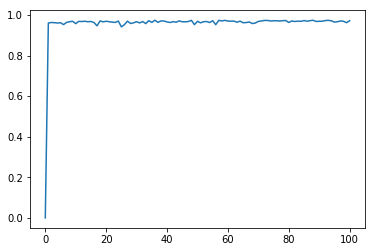

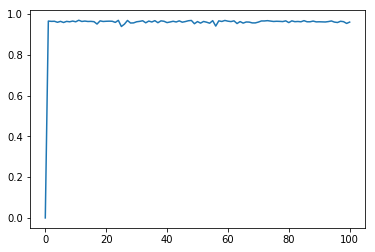

Confusion Matrix:
TP: 943
FP: 968
FN: 39
TN: 41
End of run


In [61]:
perceptron(100)

In [64]:
#Perceptron Algorithm
import matplotlib.pyplot as plt
def perceptron_roc(epochs):
    weights = np.array(np.zeros(shape=(1,784)))
    length=len(arr_train_x)
    acc=[]
    x=[]
    acc_test=[]
    x_test=[]
    c=0
    e=0
    acc_test.append(0)
    x_test.append(0)
    acc.append(0)
    x.append(0)
    w_dash=np.array(np.zeros(shape=(1,784)))
    margins=[]
    while e<epochs:
        flag=1
        #print(e)
        i=0
        while i<length:
            c=c+1
            #print(c)
            #print np.vdot(trainset[0],weights[0])
            if arr_train_y[i]*(np.vdot(arr_train_x[i],weights))<=0 :
                margins.append(np.vdot(arr_train_x[i],weights))
                flag=0
                weights=weights+np.array((arr_train_y[i]*arr_train_x[i]))
            if(i==length/3 and e==0):
                w_dash=weights
            i=i+1
        #print(weights)
        if flag==1:
            #print("HERE")
            break
        k=0
        count=0
        while k<length:
            if arr_train_y[k]*(np.vdot(arr_train_x[k],weights))<=0 :
                count=count+1
            k=k+1
        w=0
        test_count=0
        while w<len(arr_test_x):
            if arr_test_y[w]*(np.vdot(arr_test_x[w],weights))<=0 :
                test_count=test_count+1
            w=w+1
        acc.append((length-count)/length)
        acc_test.append((len(arr_test_x)-test_count)/len(arr_test_x))
        x.append(e+1)
        x_test.append(e+1)
        e=e+1
    print(weights)
    plt.plot(x,acc)
    plt.show()
    plt.plot(x_test,acc_test)
    plt.show()
    w=0
    tn=0
    tp=0
    fp=0
    fn=0
    #margins.sort()
    #print(margins)
    bias=[]
    b=-160
    while b<=160:
        bias.append(b)
        b=b+10
    while w<len(arr_test_x):
        if (np.vdot(arr_test_x[w],weights))<=0 and arr_test_y[w]<=0:
            tn=tn+1
        elif (np.vdot(arr_test_x[w],weights))<=0 and arr_test_y[w]>0:
            fn=fn+1
        elif (np.vdot(arr_test_x[w],weights))>0 and arr_test_y[w]>0:
            tp=tp+1
        elif (np.vdot(arr_test_x[w],weights))>0 and arr_test_y[w]<=0:
            fp=fp+1
        w=w+1
    print("Confusion Matrix:")
    print("TP: "+str(tp))
    print("FP: "+str(fp))
    print("FN: "+str(fn))
    print("TN: "+str(tn))
    
    fpr=[]
    tpr=[]
    for b in bias:
        w=0
        tn=0
        tp=0
        fp=0
        fn=0
        while w<len(arr_train_x):
            #print(np.vdot(arr_test_x[w],weights))
            if (np.vdot(arr_train_x[w],weights)-b)<=0 and arr_train_y[w]<=0:
                tn=tn+1
            elif (np.vdot(arr_train_x[w],weights)-b)<=0 and arr_train_y[w]>0:
                fn=fn+1
            elif (np.vdot(arr_train_x[w],weights)-b)>0 and arr_train_y[w]>0:
                tp=tp+1
            elif (np.vdot(arr_train_x[w],weights)-b)>0 and arr_train_y[w]<=0:
                fp=fp+1
            w=w+1
        tpr.append(tp/(fn+tp))
        fpr.append(fp/(fp+tn))
    #print(fpr)
    #print(tpr)
    fpr_dash=[]
    tpr_dash=[]
    for b in bias:
        w=0
        tn=0
        tp=0
        fp=0
        fn=0
        while w<len(arr_train_x):
            #print(np.vdot(arr_test_x[w],weights))
            if (np.vdot(arr_train_x[w],w_dash)-b)<=0 and arr_train_y[w]<=0:
                tn=tn+1
            elif (np.vdot(arr_train_x[w],w_dash)-b)<=0 and arr_train_y[w]>0:
                fn=fn+1
            elif (np.vdot(arr_train_x[w],w_dash)-b)>0 and arr_train_y[w]>0:
                tp=tp+1
            elif (np.vdot(arr_train_x[w],w_dash)-b)>0 and arr_train_y[w]<=0:
                fp=fp+1
            w=w+1
        tpr_dash.append(tp/(fn+tp))
        fpr_dash.append(fp/(fp+tn))
    plt.plot(fpr,tpr)
    plt.plot(fpr_dash,tpr_dash)
    plt.show()
    #plt.plot(fpr_dash,tpr_dash)
    #plt.show()
    #print(len(tpr))
    #Riemann Sum
    dx=0.1
    sum=0.0
    sum1=0.0
    a=0.1
    b=1.0
    t=3
    while(a<b):
        #print(tpr[t]*dx)
        sum=sum+(tpr[t]*dx)
        sum1=sum1+(tpr_dash[t]*dx)
        t=t+3
        a=a+dx
    print("Riemann Sum of AUC with w*: "+str(sum))
    print("Riemann Sum of AUC with W1: "+str(sum1))
    print("End of run")

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00  

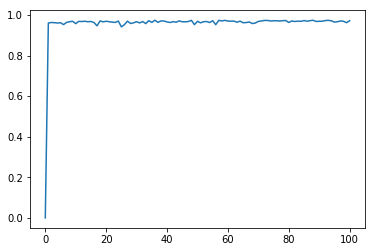

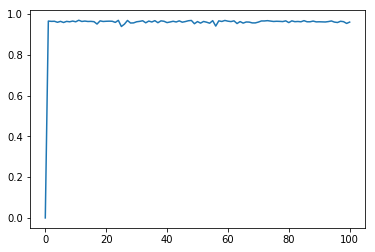

Confusion Matrix:
TP: 943
FP: 41
FN: 39
TN: 968


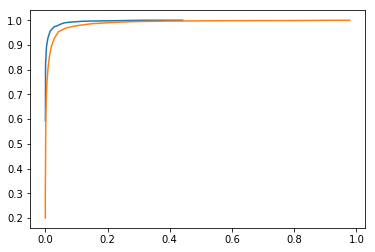

Riemann Sum of AUC with w*: 0.9001695873374789
Riemann Sum of AUC with W1: 0.8055398530243076
End of run


In [65]:
perceptron_roc(100)